In [1]:
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
from sklearn.metrics import accuracy_score
import math
import copy as cp

In [2]:
df1=pd.read_csv("../data/first_round_training_data.csv")
df2=pd.read_csv("../data/first_round_testing_data.csv")

In [3]:
df1.describe()

,Parameter1,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9,Parameter10,Attribute1,Attribute2,Attribute3,Attribute4,Attribute5,Attribute6,Attribute7,Attribute8,Attribute9,Attribute10
count,6000.000000,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03,6.000000e+03
mean,485.198954,1.952379e+03,406.348529,189.205842,5.868163e+00,5.598597e+00,272.300821,22.133231,5.823664e+04,35.902066,5.351032e+04,8.842895e+04,202.732522,6.271156e+03,1.285985e+06,3.400877e+03,3.166863e+04,4.545394e+05,7.860735e+05,1.989520e+07
std,11401.971393,5.419588e+04,12018.898941,2621.779049,8.631865e+00,7.686898e+00,2027.460514,302.172768,3.173068e+06,101.629348,1.894866e+06,2.854543e+06,2754.503943,2.585508e+05,9.850723e+07,1.999508e+05,1.116889e+06,2.847995e+07,5.885757e+07,1.529785e+09
min,0.000003,1.683797e-07,0.000005,0.000002,9.985942e-07,9.810610e-07,0.000624,0.023699,3.962831e-04,0.001024,6.457597e-10,5.493777e-09,0.000001,4.344229e-06,1.635864e-06,5.456653e-05,4.411611e-03,3.011145e-03,2.366726e-03,1.974795e-03
25%,0.088221,4.765771e-02,0.102304,0.118314,7.416296e-01,3.818154e-01,0.152059,0.035407,5.930812e-01,0.101478,3.100601e-02,3.173294e-02,0.098178,1.319373e-01,1.150362e-01,1.443224e-01,1.135895e-01,1.115708e-01,1.267717e-01,1.253268e-01
50%,1.050304,9.405962e-01,1.044908,1.068467,2.225808e+00,2.684398e+00,0.600827,2.931083,5.930812e-01,0.727611,9.449563e-01,1.030499e+00,0.945947,8.297855e-01,7.539155e-01,9.864325e-01,5.891701e-01,5.922906e-01,6.644951e-01,6.705953e-01
75%,10.938565,1.569199e+01,10.665397,9.902064,6.680183e+00,7.117767e+00,2.374035,17.850021,6.783967e+00,13.969790,2.784766e+01,3.001000e+01,9.803828,6.052952e+00,5.736029e+00,7.422284e+00,4.637157e+00,4.773050e+00,5.571728e+00,4.905501e+00
max,713682.207601,3.034568e+06,864530.632179,139767.494732,8.367195e+01,4.117541e+01,35698.591553,20086.397753,1.738083e+08,517.197610,1.197060e+08,1.615907e+08,128491.084741,1.572225e+07,7.630284e+09,1.488592e+07,7.789923e+07,2.187522e+09,4.558485e+09,1.184961e+11


['Parameter1', 'Parameter2', 'Parameter3', 'Parameter4', 'Parameter5', 'Parameter6', 'Parameter7', 'Parameter8', 'Parameter9', 'Parameter10']


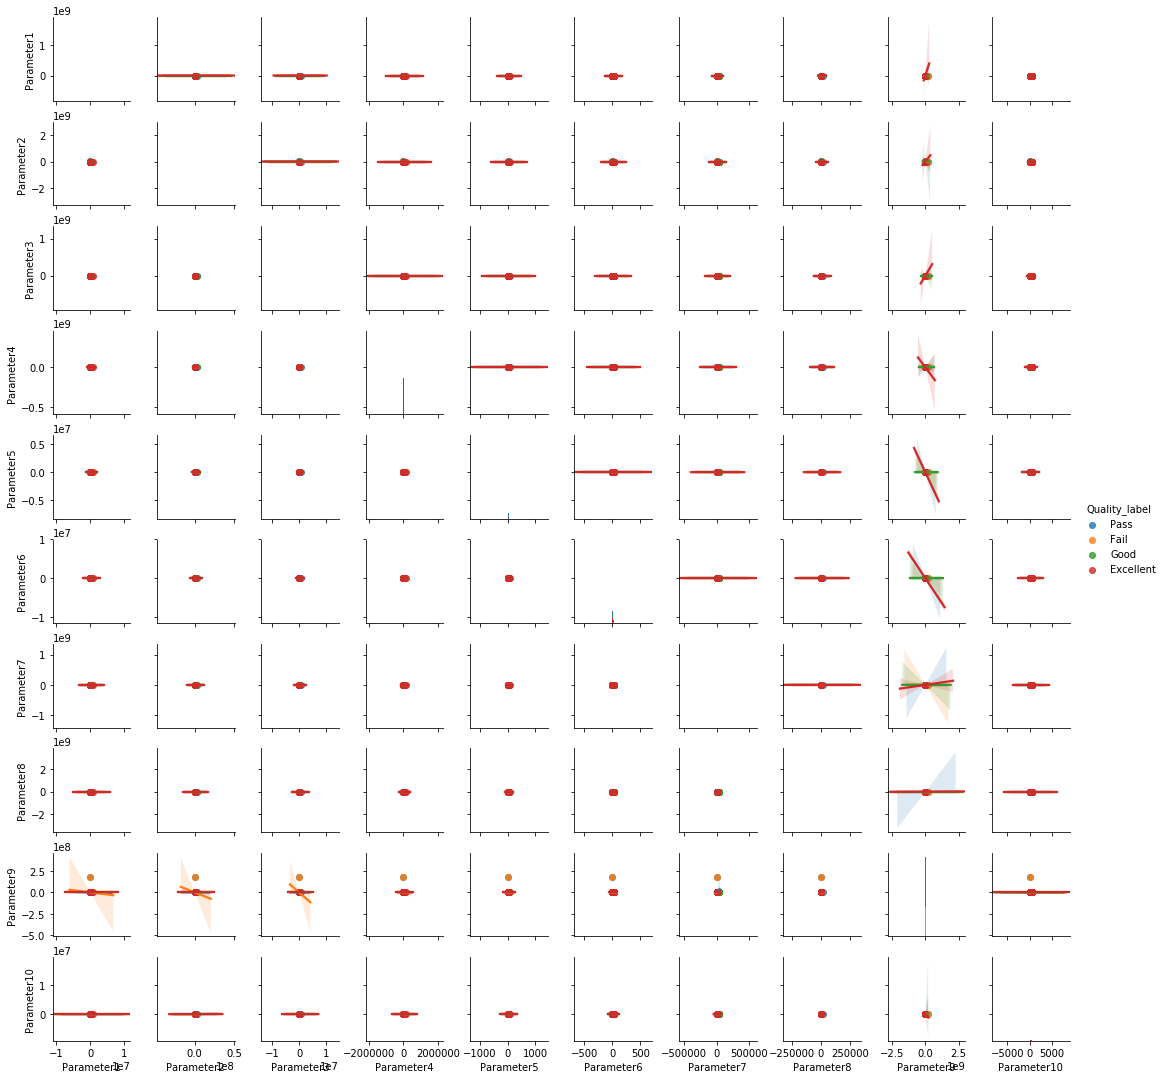

In [5]:
import seaborn as sns
columns = ['Parameter' + str(item) for item in range(1,11)]
print(columns)
g = sns.pairplot(df1, hue='Quality_label', hue_order=None, palette=None, 
                     vars=columns, 
                     x_vars=None, y_vars=None, 
                     kind="reg", diag_kind="hist", 
                     size=1.5, aspect=1, 
                     dropna=True, plot_kws=None, 
                     diag_kws=None, grid_kws=None)
# df1.groupby('Quality_label')['Parameter1'].plot()

In [15]:
del df2['Group']
df2.describe()

,Parameter1,Parameter10,Parameter2,Parameter3,Parameter4,Parameter5,Parameter6,Parameter7,Parameter8,Parameter9
count,6.000000e+03,6000.000000,6000.000000,6.000000e+03,6.000000e+03,6000.000000,6000.000000,6000.000000,6000.000000,6.000000e+03
mean,1.072897e+05,26.514627,369.101132,1.132272e+03,2.196607e+07,5.019799,5.404172,210.884571,59.810770,8.764239e+04
std,2.980241e+06,84.807106,6352.033456,3.220140e+04,1.429351e+09,6.782677,6.788654,1616.938611,1545.270888,3.885921e+06
min,1.331475e-09,0.001024,0.000001,5.436324e-08,4.859234e-10,0.000003,0.000005,0.000624,0.023699,3.962831e-04
25%,2.233015e-02,0.101478,0.090422,6.985572e-02,1.867368e-02,0.827784,0.563965,0.152059,0.035407,5.930812e-01
50%,8.489791e-01,0.727611,1.000019,8.985648e-01,1.002728e+00,2.772987,2.684398,0.600827,2.931083,5.930812e-01
75%,3.103161e+01,10.060093,12.159195,1.300345e+01,5.193707e+01,6.680183,7.117767,2.374035,17.850021,6.783967e+00
max,1.758842e+08,517.197610,317368.685606,2.183219e+06,1.101618e+11,83.671947,41.175410,35698.591553,66984.723637,1.738083e+08


In [8]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6000 entries, 0 to 5999
Data columns (total 21 columns):
Parameter1       6000 non-null float64
Parameter2       6000 non-null float64
Parameter3       6000 non-null float64
Parameter4       6000 non-null float64
Parameter5       6000 non-null float64
Parameter6       6000 non-null float64
Parameter7       6000 non-null float64
Parameter8       6000 non-null float64
Parameter9       6000 non-null float64
Parameter10      6000 non-null float64
Attribute1       6000 non-null float64
Attribute2       6000 non-null float64
Attribute3       6000 non-null float64
Attribute4       6000 non-null float64
Attribute5       6000 non-null float64
Attribute6       6000 non-null float64
Attribute7       6000 non-null float64
Attribute8       6000 non-null float64
Attribute9       6000 non-null float64
Attribute10      6000 non-null float64
Quality_label    6000 non-null object
dtypes: float64(20), object(1)
memory usage: 984.5+ KB


In [5]:
df1.groupby('Quality_label')['Quality_label'].count()

Quality_label
Excellent    1107
Fail          892
Good         1584
Pass         2417
Name: Quality_label, dtype: int64

In [ ]:
columns = ['Parameter1' + str(item) for item in range(1,11)]
print(columns)